# GRIP : THE SPARKS FOUNDATION

# DATA SCIENCE AND BUSINESS ANALYTICS 

# Name : Rupam Ghosh

# Task 2 : Prediction Using Unsupervised ML

## Problem Statement: 
 1) From the given 'Iris' Dataset, predict the optimum number of clusters and represent it visually.

###  Import the required Python Libraries 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15,8]
import matplotlib.cm as cm

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples

###  Reading the data from given Dataset

In [71]:
df = pd.read_csv('Iris.csv')

In [72]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## See the summary of the Dataset 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [74]:
df.shape

(150, 6)

In [75]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### No use of ID and Species column
#### So dropping this two features

In [77]:
df = df.drop(columns=['Id','Species'],axis=1)

In [78]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### As all the features are in the range of 1-10 we don't need to do scaling

In [80]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

#### There are no null values in the dataset

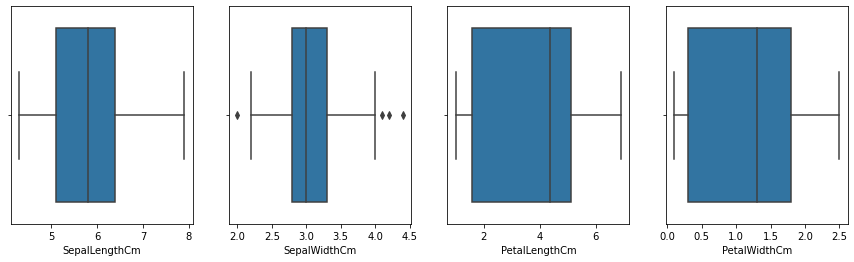

In [82]:

# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(15, 4))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df[variable], ax = subplot)

# display the plot
plt.show()

#### There are no outliers present in the dataset

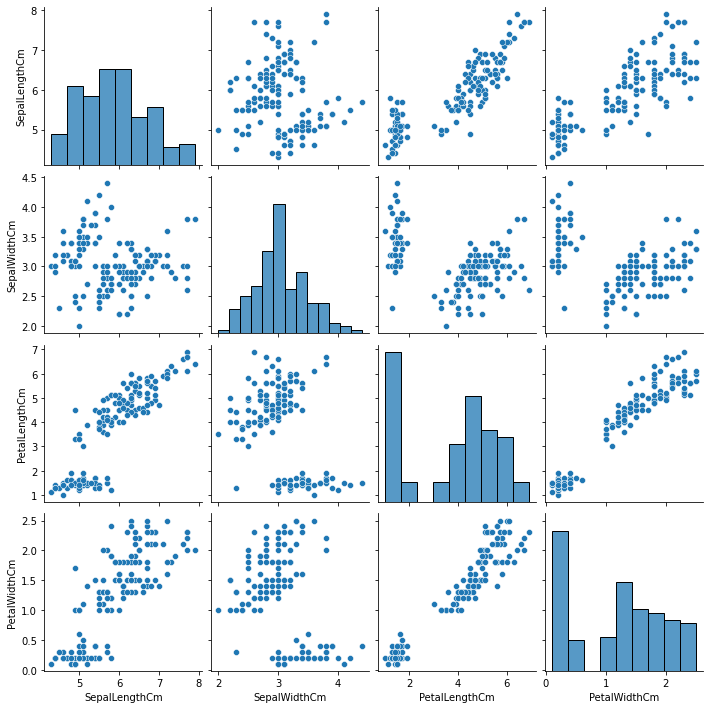

In [84]:
sns.pairplot(df)
plt.show()

<a id="elbow"></a>
##  Optimal Value of K Using Elbow Plot

In [86]:
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [87]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.95701115711987,
 34.190687924796634,
 30.27495426400225,
 28.11089627039629,
 26.523114676173513,
 24.593198439503407,
 22.87365014152515,
 21.616681734588095,
 20.742064330277575,
 19.14752269952271,
 18.435494921744926,
 17.347359279609297,
 16.36412515262516,
 15.77561227661228,
 14.747146284271292]

Let us plot the elbow plot and identify the elbow point

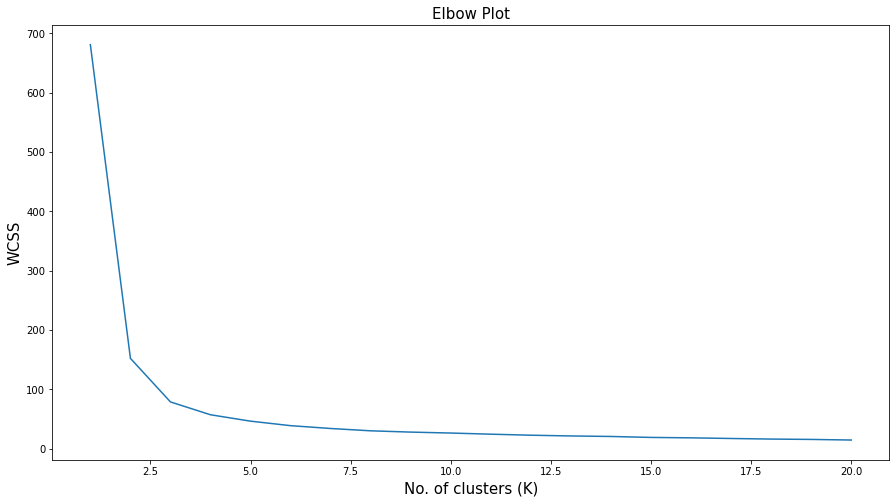

In [88]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

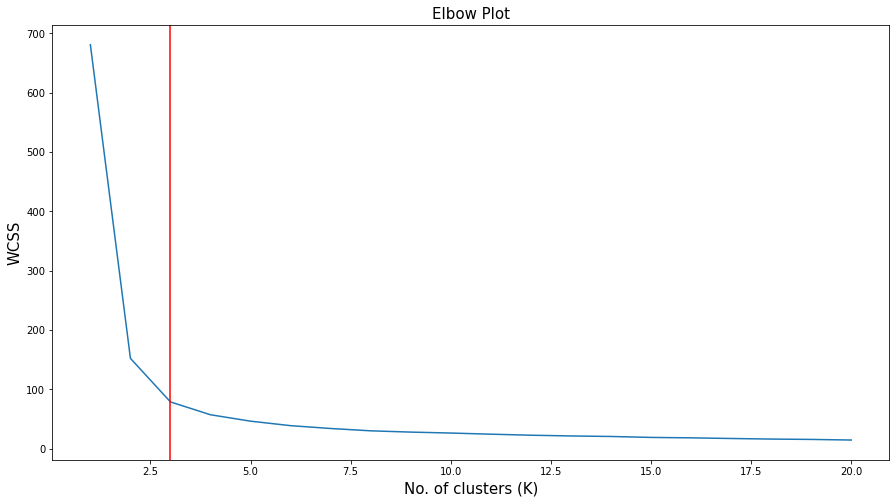

In [89]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 3, color = 'red')

# display the plot
plt.show()

**Interpretation:** We can see that the for K = 3, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 3, the WCSS is decreasing slowly.

Now, let us use the silhouette score method to identify the optimal value of K.

#  Optimal Value of K Using Silhouette Score

#### The Silhouette score can also be used to identify the optimal number of clusters. We plot the Silhouette score for different values of K. The K with the highest Silhouette score represents the optimal value for the number of clusters (K)

In [91]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df)
    score = silhouette_score(df, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.6808136202936816)
For 3 clusters the silhouette score is 0.5525919445499757)
For 4 clusters the silhouette score is 0.4978256901095472)
For 5 clusters the silhouette score is 0.4885175508886279)
For 6 clusters the silhouette score is 0.37121805054590085)
For 7 clusters the silhouette score is 0.3600597997328459)
For 8 clusters the silhouette score is 0.3603749708042153)
For 9 clusters the silhouette score is 0.3139310239112048)
For 10 clusters the silhouette score is 0.3080145835492473)


In [92]:
model = KMeans(n_clusters = K, random_state = 10)
    
# fit and predict on the scaled data
cluster_labels = model.fit_predict(df)

# the 'silhouette_score()' gives the average value for all the samples
silhouette_avg = silhouette_score(df, cluster_labels)
    
# Compute the silhouette coefficient for each sample
sample_silhouette_values = silhouette_samples(df, cluster_labels)
sample_silhouette_values

array([ 0.51751289,  0.37175474,  0.39696447,  0.4709065 ,  0.4804413 ,
        0.21222654,  0.16304241,  0.41226864,  0.49097643,  0.30064686,
        0.09162185,  0.13296986,  0.45868776,  0.43304599,  0.41160064,
        0.40636983,  0.29185214,  0.52914769,  0.3125863 ,  0.20102046,
        0.25640561,  0.3463928 ,  0.05159654,  0.37104696,  0.17397277,
        0.16106092,  0.44221425,  0.4589337 ,  0.47126381,  0.28429922,
        0.31126885,  0.2604306 ,  0.21766163,  0.44959754,  0.30064686,
        0.04267964, -0.05226349,  0.30064686,  0.49759157,  0.49056827,
        0.39827795,  0.34268284,  0.43746193,  0.42090814,  0.17886728,
        0.41701132,  0.19491183,  0.43952273, -0.10507875,  0.19441369,
        0.56938286,  0.41258746,  0.51429753,  0.19617467,  0.44534985,
        0.33126859,  0.29398545,  0.50161265,  0.56531943,  0.05319833,
        0.38784983,  0.29185996,  0.39726709,  0.05435121, -0.00768637,
        0.5813129 ,  0.42607074,  0.19807262,  0.11413866,  0.20

#### Visualize the silhouette scores 

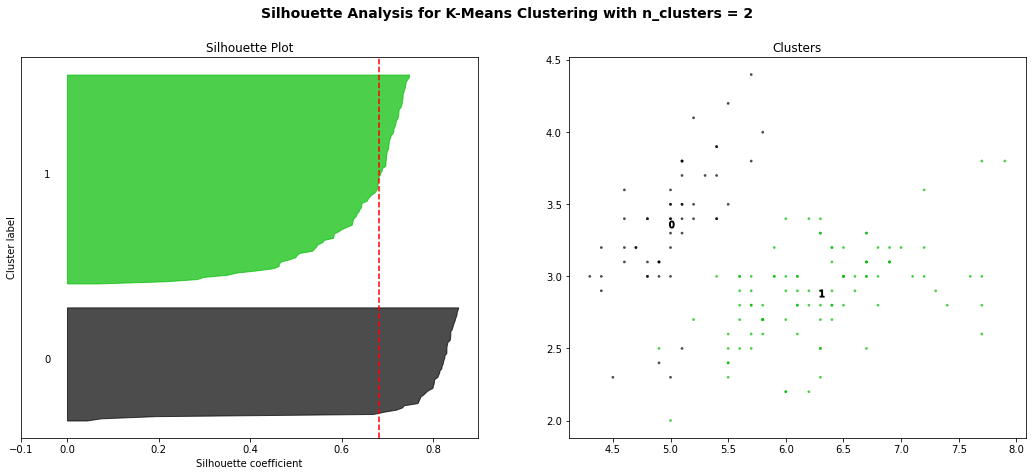

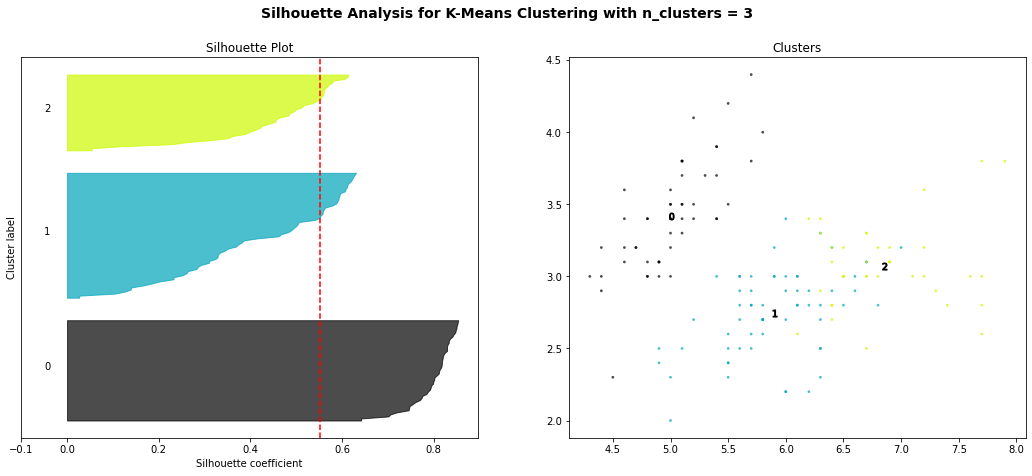

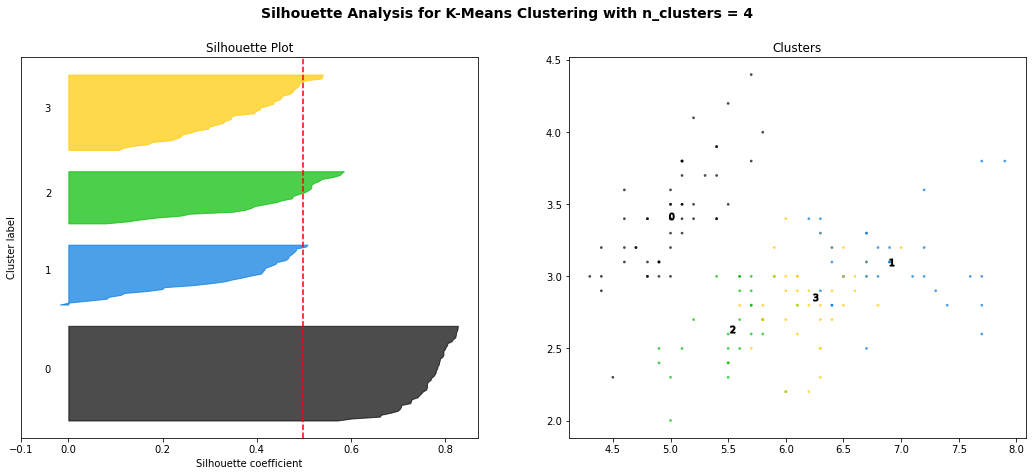

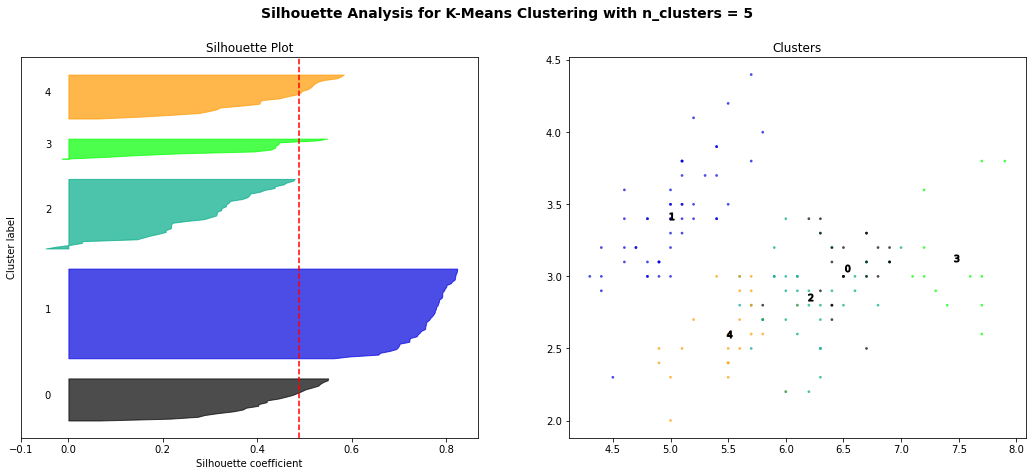

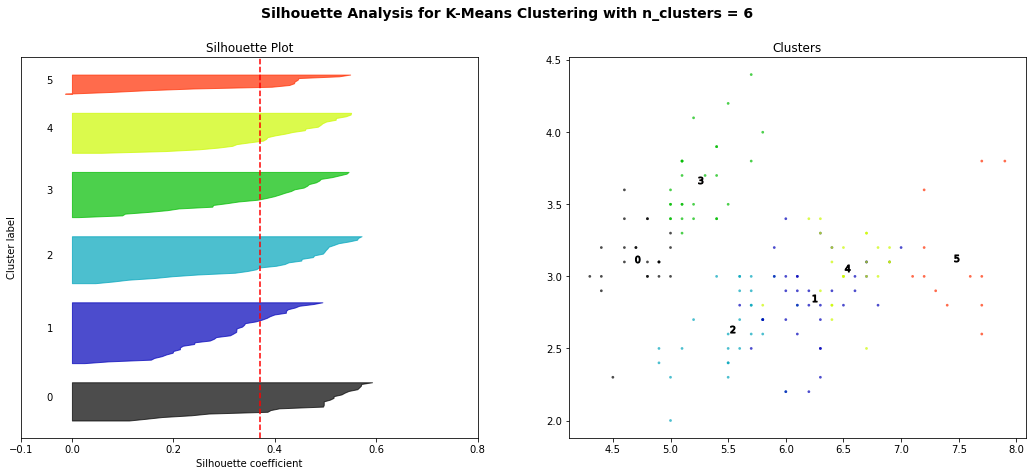

In [93]:
# consider the number of clusters
n_clusters = [2, 3, 4, 5, 6]

# consider an array of the data
df_1 = np.array(df)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(df_1)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(df_1, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(df_1, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(df_1[:, 0], df_1[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

#### The above plot shows the silhouette plot and the clusters formed for each value of K. The plot shows that there are outliers (where the silhouette coefficient is less than 0) for K =4,5,6. Also for K = 2, the 2nd cluster has the silhouette score less than the average silhouette score. Thus we can not consider the K values as 2,3,4 and 6.

Also from the above output, we can see that the silhouette score is maximum for k = 3 and from the plot, we can see that there are no outliers for 3 clusters and all the clusters have silhouette coefficients greater than the average silhouette score. Thus we choose K = 3 as the optimal value of k.



<a id="model"></a>
##  Build the Clusters

Let us build the 3 clusters using K-menas clustering.

In [94]:
# build a K-Means model with 5 clusters
new_clusters = KMeans(n_clusters = 3, random_state = 10)

# fit the model
new_clusters.fit(df)

# append the cluster label for each point in the dataframe 'df_cust'
df['Cluster'] = new_clusters.labels_

In [96]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Check the size of each cluster 

In [97]:
df.Cluster.value_counts()

1    62
0    50
2    38
Name: Cluster, dtype: int64

### Conclusion : The optimum number of cluster is 3.